In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [3]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])

In [6]:
# get data
series = pd.read_csv(
    "data/catfish.csv", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser
)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004, 1, 1) :]
series = series.diff().diff().dropna()

In [7]:
# check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


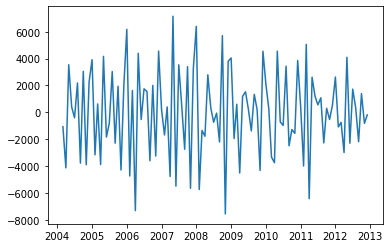

In [8]:
plt.plot(series)

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


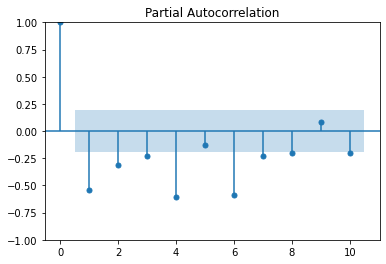

In [9]:
plot_pacf(series, lags=10)
plt.show()

# Either AR(1), AR(4), AR(6), or AR(10)

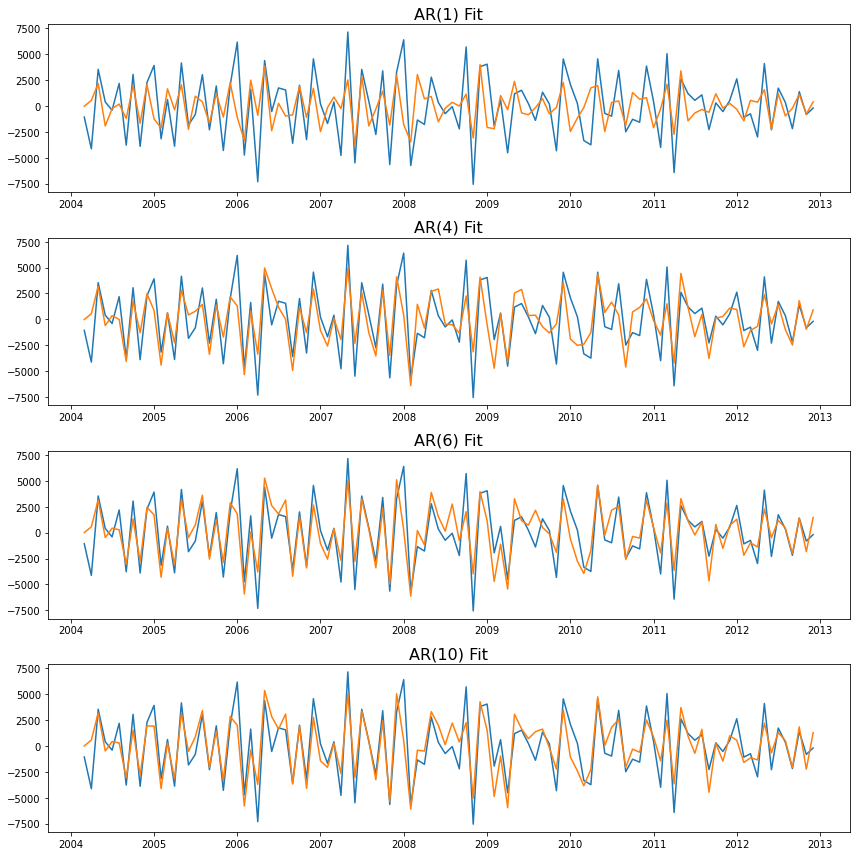

In [10]:
plt.figure(figsize=(12, 12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):

    # create AR(p) model
    ar_model = ARIMA(series, order=(ar_order, 0, 0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4, 1, idx + 1)
    plt.plot(series)
    # prediction on training data
    plt.plot(ar_model_fit.fittedvalues)
    plt.title("AR(%s) Fit" % ar_order, fontsize=16)

plt.tight_layout()

# Each model has: 

## a log likelihood ($l$)
## a number of parameters ($k$)
## a number of samples used for fitting ($n$)

# AIC = 2$k$ - 2$l$

## Lower AIC via higher log likelihood or less parameters

# BIC = $\ln(n)k$ - 2$l$

## Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [11]:
# AIC comparison
for ar_order in ar_orders:
    print("AIC for AR(%s): %s" % (ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660268
AIC for AR(6): 1899.6497441377037
AIC for AR(10): 1902.3765450362453


## Based on AIC criteria, pick AR(6)

In [12]:
# BIC comparison
for ar_order in ar_orders:
    print("BIC for AR(%s): %s" % (ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.590619830699
BIC for AR(6): 1920.9572568906003
BIC for AR(10): 1934.33781416559


## Based on BIC criteria, pick AR(6)